In [54]:
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
import keras
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI
%matplotlib inline

In [56]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70
16. 4HFI_pH70
17. 4NPQ_F238LI233T_pH46
18. 4NPQ_F238L_pH46
19. 4NPQ_pH46
20. 4NPQ_I233T_pH46

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n16. 4HFI_pH70\n17. 4NPQ_F238LI233T_pH46\n18. 4NPQ_F238L_pH46\n19. 4NPQ_pH46\n20. 4NPQ_I233T_pH46\n\n'

In [57]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1','4NPQ_F238LI233T_pH46_md1',
               '4NPQ_F238L_pH46_md1','4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [58]:
md_data = pd.read_csv("glic_gating_new.csv")

In [59]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [60]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [62]:
md_traj10 = md_data[(md_data.traj_time >= 10)]
md_traj10 = md_traj10.reset_index()

In [61]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data', 'beta_expansion', 'M2_radius',
       'ECD_radius'],
      dtype='object')

In [107]:
dataset = md_data[['system',
       'domain twist', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data','beta_expansion', 'M2_radius',
       'ECD_radius']]

In [108]:
test_X = dataset[['domain twist', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data','beta_expansion', 'M2_radius',
       'ECD_radius']]

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_X)
test_x_scaled = scaler.transform(test_X)

In [110]:
trainset = dataset[((dataset['system'] == 8) |(dataset['system'] == 9)|(dataset['system'] == 10)|(dataset['system'] == 12)|(dataset['system'] == 13)|(dataset['system'] == 14)) & (md_data['traj_time'] >= 30)]

In [66]:
trainset_2 = dataset[((dataset['system'] == 10) |(dataset['system'] == 12)) & (md_data['traj_time'] >= 10)]

In [67]:
trainset_2 = trainset_2.reset_index()
trainset_2 = trainset_2.drop(['index'],axis=1)
trainset_2 = trainset_2.replace({'system': {10: 1}})
trainset_2 = trainset_2.replace({'system': {12: 0}})
Y = trainset_2.as_matrix()[:,0]
X = scaler.transform(trainset_2.as_matrix()[:,1:])


In [111]:
trainset = trainset.reset_index()
trainset = trainset.drop(['index'],axis=1)
trainset = trainset.replace({'system': {8: 1}})
trainset = trainset.replace({'system': {9: 1}})
trainset = trainset.replace({'system': {10: 1}})
#trainset = trainset.replace({'system': {11: 1}})
trainset = trainset.replace({'system': {12: 0}})
trainset = trainset.replace({'system': {13: 0.1}})
trainset = trainset.replace({'system': {14: 0.4}})
#trainset = trainset.replace({'system': {15: 0.2}})
Y = trainset.as_matrix()[:,0]
X = scaler.transform(trainset.as_matrix()[:,1:])


In [112]:
dataset.columns

Index(['system', 'domain twist', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'hydration_data', 'beta_expansion', 'M2_radius', 'ECD_radius'],
      dtype='object')

In [113]:
Y.shape

(1184,)

In [114]:
X.shape

(1184, 13)

In [115]:
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
import numpy
numpy.random.seed(7)

In [116]:
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

In [119]:
model.fit(X, Y,batch_size=32,nb_epoch=20,callbacks=[tbCallBack])

Epoch 1/20
1184/1184 [==============================] - 1s - loss: 0.5262 - acc: 0.5701     
Epoch 2/20
1184/1184 [==============================] - 1s - loss: 0.3526 - acc: 0.6647     
Epoch 3/20
1184/1184 [==============================] - 1s - loss: 0.2828 - acc: 0.6698     
Epoch 4/20
1184/1184 [==============================] - 1s - loss: 0.2534 - acc: 0.6706     
Epoch 5/20
1184/1184 [==============================] - 0s - loss: 0.2381 - acc: 0.6706     
Epoch 6/20
1184/1184 [==============================] - 1s - loss: 0.2284 - acc: 0.6706     
Epoch 7/20
1184/1184 [==============================] - 1s - loss: 0.2211 - acc: 0.6706     
Epoch 8/20
1184/1184 [==============================] - 1s - loss: 0.2157 - acc: 0.6706     
Epoch 9/20
1184/1184 [==============================] - 1s - loss: 0.2118 - acc: 0.6706     
Epoch 10/20
1184/1184 [==============================] - 1s - loss: 0.2085 - acc: 0.6706     
Epoch 11/20
1184/1184 [==============================] - 0s - loss: 0

In [76]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 16)            224         dense_input_2[0][0]              
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            170         dense_4[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1)             11          dense_5[0][0]                    
Total params: 405
Trainable params: 405
Non-trainable params: 0
____________________________________________________________________________________________________


In [77]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

224/458 [=============>................] - ETA: 0s
acc: 100.00%


In [83]:
predictions = model.predict(test_x_scaled)
dataset['predict'] = predictions
dataset['traj_time'] = md_data['traj_time']
dataset['ecd_pc1'] = md_data['ecd_pc1']
dataset['tmd_pc1'] = md_data['tmd_pc1']

dataset.to_csv('neural_network.csv')

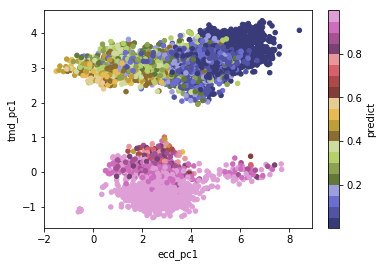

In [84]:
ax = plt.subplot()
dataset.plot(kind='scatter',x='ecd_pc1',y='tmd_pc1',c='predict',colormap='Vega20b',ax=ax)

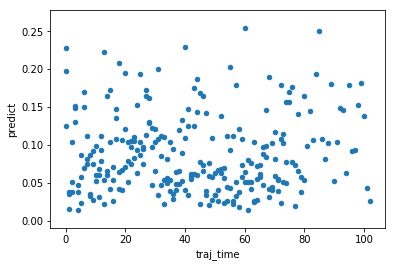

In [85]:
dataset[dataset['system'] == 0].plot(kind='scatter', x='traj_time',y='predict')

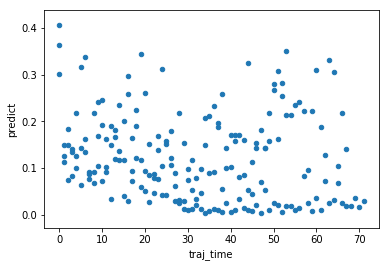

In [86]:
dataset[dataset['system'] == 1].plot(kind='scatter', x='traj_time',y='predict')

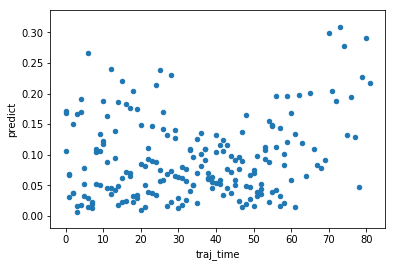

In [87]:
dataset[dataset['system'] == 2].plot(kind='scatter', x='traj_time',y='predict')

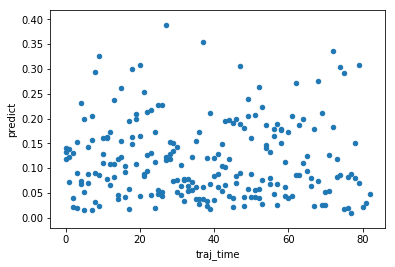

In [88]:
dataset[dataset['system'] == 3].plot(kind='scatter', x='traj_time',y='predict')

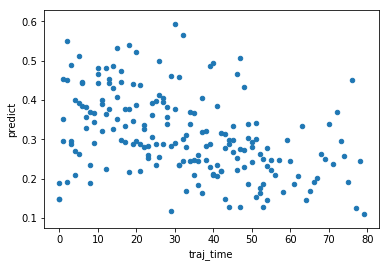

In [89]:
dataset[dataset['system'] == 4].plot(kind='scatter', x='traj_time',y='predict')

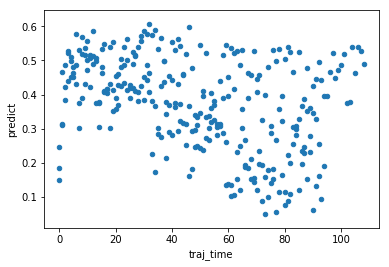

In [90]:
dataset[dataset['system'] == 5].plot(kind='scatter', x='traj_time',y='predict')

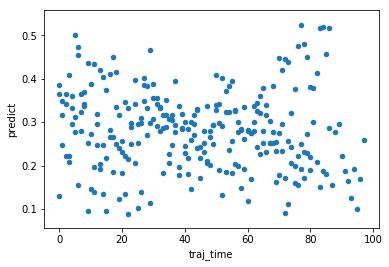

In [91]:
dataset[dataset['system'] == 6].plot(kind='scatter', x='traj_time',y='predict')

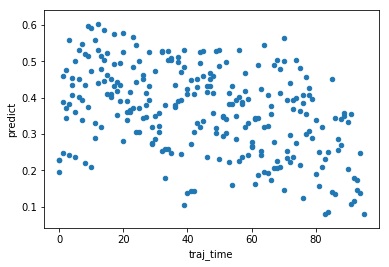

In [92]:
dataset[dataset['system'] == 7].plot(kind='scatter', x='traj_time',y='predict')

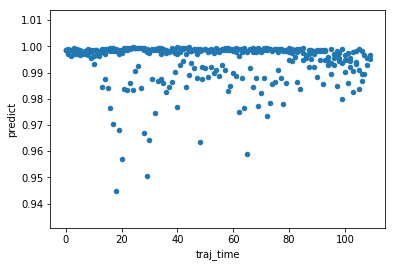

In [93]:
dataset[dataset['system'] == 8].plot(kind='scatter', x='traj_time',y='predict')

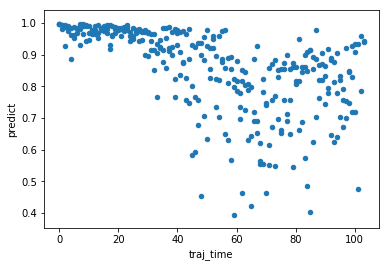

In [94]:
dataset[dataset['system'] == 9].plot(kind='scatter', x='traj_time',y='predict')

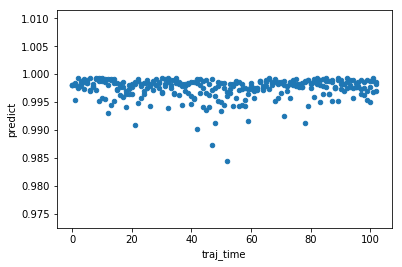

In [95]:
dataset[dataset['system'] == 10].plot(kind='scatter', x='traj_time',y='predict')

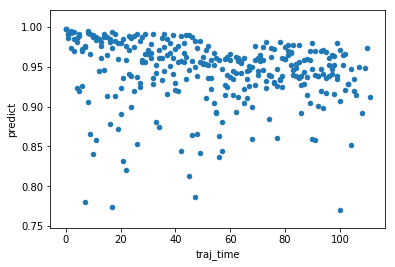

In [96]:
dataset[dataset['system'] == 11].plot(kind='scatter', x='traj_time',y='predict')

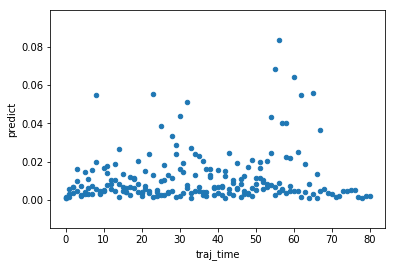

In [97]:
dataset[dataset['system'] == 12].plot(kind='scatter', x='traj_time',y='predict')

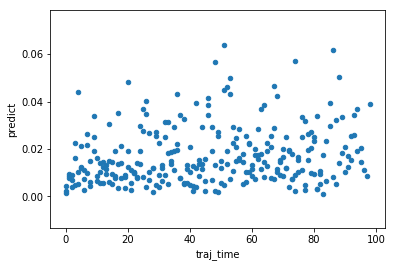

In [98]:
dataset[dataset['system'] == 13].plot(kind='scatter', x='traj_time',y='predict')

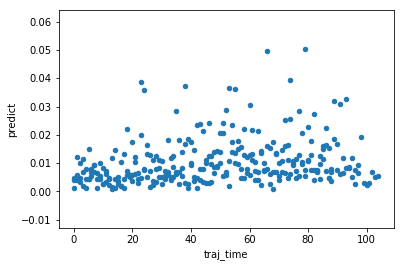

In [99]:
dataset[dataset['system'] == 14].plot(kind='scatter', x='traj_time',y='predict')

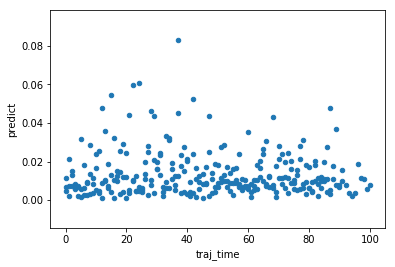

In [100]:
dataset[dataset['system'] == 15].plot(kind='scatter', x='traj_time',y='predict')

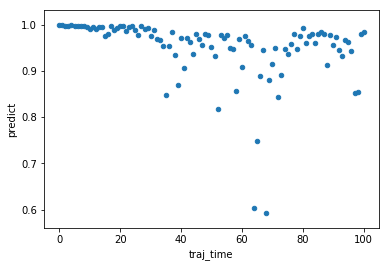

In [101]:
dataset[dataset['system'] == 16].plot(kind='scatter', x='traj_time',y='predict')

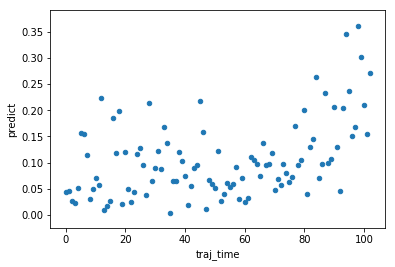

In [102]:
dataset[dataset['system'] == 17].plot(kind='scatter', x='traj_time',y='predict')

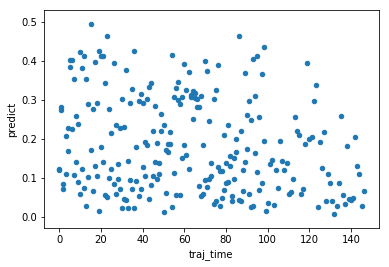

In [103]:
dataset[dataset['system'] == 18].plot(kind='scatter', x='traj_time',y='predict')

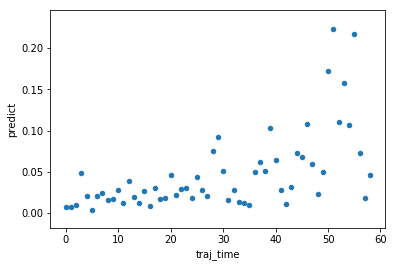

In [104]:
dataset[dataset['system'] == 19].plot(kind='scatter', x='traj_time',y='predict')

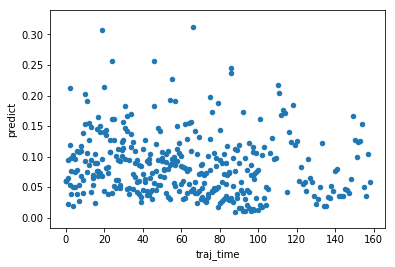

In [105]:
dataset[dataset['system'] == 20].plot(kind='scatter', x='traj_time',y='predict')